In [2]:
# Standard python libraries
import os
import time

# Essential DS libraries
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import torch
import seaborn as sns
import matplotlib.pyplot as plt

# LightAutoML presets, task and report generation
from lightautoml.automl.presets.image_presets import TabularCVAutoML
from lightautoml.tasks import Task

In [8]:
np.random.seed(42)
torch.set_num_threads(2)

In [3]:
INPUT_DIR = './paddy-disease/'

In [20]:
train_data = pd.read_csv(INPUT_DIR + 'train.csv')
print(train_data.shape)
train_data.head()

(10407, 4)


,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


Добавляем колонку с путями картинок.



In [21]:
%%time

train_data['path'] = INPUT_DIR + 'train_images/' + train_data['label'] + '/' + train_data['image_id']
train_data.head()

CPU times: user 6.4 ms, sys: 1.08 ms, total: 7.48 ms
Wall time: 10.8 ms


,image_id,label,variety,age,path
0,100330.jpg,bacterial_leaf_blight,ADT45,45,./paddy-disease/train_images/bacterial_leaf_bl...
1,100365.jpg,bacterial_leaf_blight,ADT45,45,./paddy-disease/train_images/bacterial_leaf_bl...
2,100382.jpg,bacterial_leaf_blight,ADT45,45,./paddy-disease/train_images/bacterial_leaf_bl...
3,100632.jpg,bacterial_leaf_blight,ADT45,45,./paddy-disease/train_images/bacterial_leaf_bl...
4,101918.jpg,bacterial_leaf_blight,ADT45,45,./paddy-disease/train_images/bacterial_leaf_bl...


### Создание модели

In [23]:
task = Task('multiclass')

roles = {
    'target': 'label',
    'path': ['path'],
    'drop': ['variety', 'age'],
    'group': 'image_id'
}

automl = TabularCVAutoML(task=task,
                         timeout=3600,
                         cpu_limit=2,
                         reader_params={'cv': 4, 'random_state': 42})

### Обучение

In [24]:
%%time 

oof_pred = automl.fit_predict(train_data, roles=roles, verbose=3)

[00:22:04] Stdout logging level is INFO3.
[00:22:04] Task: multiclass

[00:22:04] Start automl preset with listed constraints:
[00:22:04] - time: 3600.00 seconds
[00:22:04] - CPU: 2 cores
[00:22:04] - memory: 16 GB

[00:22:04] Train data shape: (10407, 5)

[00:22:04] Layer 1 train process start. Time left 3599.92 secs


Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/adv-efficientnet-b0-b64d5a18.pth" to /root/.cache/torch/hub/checkpoints/adv-efficientnet-b0-b64d5a18.pth


  0%|          | 0.00/20.4M [00:00<?, ?B/s]

Loaded pretrained weights for efficientnet-b0


100%|██████████| 82/82 [01:12<00:00,  1.13it/s]


[00:23:22] Feature path transformed
[00:23:23] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[00:23:23] ===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[00:23:24] Linear model: C = 1e-05 score = -1.6055354153555599
[00:23:26] Linear model: C = 5e-05 score = -1.2046568036268392
[00:23:27] Linear model: C = 0.0001 score = -1.037389513346396
[00:23:29] Linear model: C = 0.0005 score = -0.7044149751456502
[00:23:30] Linear model: C = 0.001 score = -0.5902450302584152
[00:23:32] Linear model: C = 0.005 score = -0.4066410315283329
[00:23:33] Linear model: C = 0.01 score = -0.3638987668583561
[00:23:35] Linear model: C = 0.05 score = -0.33720491329123614
[00:23:37] Linear model: C = 0.1 score = -0.34965034073679147
[00:23:38] Linear model: C = 0.5 score = -0.4099675468180123
[00:23:38] ===== Start working with fold 1 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
[00:23:40] Linear model: C = 1e-05 score = -1.6060200854047824
[00:23:42] Linear model: C = 5e-05 score = -1.207522436

[00:27:32] 0:	learn: 2.2653420	test: 2.2654054	best: 2.2654054 (0)	total: 43.1ms	remaining: 2m 9s
[00:28:00] bestTest = 0.2690028338
[00:28:00] bestIteration = 2999
[00:28:00] ===== Start working with fold 1 for Lvl_0_Pipe_1_Mod_0_CatBoost =====


[00:28:00] 0:	learn: 2.2668477	test: 2.2670016	best: 2.2670016 (0)	total: 10.7ms	remaining: 32s
[00:28:29] bestTest = 0.2651534201
[00:28:29] bestIteration = 2999
[00:28:29] ===== Start working with fold 2 for Lvl_0_Pipe_1_Mod_0_CatBoost =====


[00:28:29] 0:	learn: 2.2656042	test: 2.2664293	best: 2.2664293 (0)	total: 10.8ms	remaining: 32.5s
[00:28:57] bestTest = 0.2952104901
[00:28:57] bestIteration = 2999
[00:28:57] ===== Start working with fold 3 for Lvl_0_Pipe_1_Mod_0_CatBoost =====


[00:28:58] 0:	learn: 2.2637109	test: 2.2660245	best: 2.2660245 (0)	total: 10.2ms	remaining: 30.6s
[00:29:25] bestTest = 0.3013892315
[00:29:25] bestIteration = 2999
[00:29:26] Fitting Lvl_0_Pipe_1_Mod_0_CatBoost finished. score = -0.28268724848507215
[00:29:26] Lvl_0_Pipe_1_Mod_0_CatBoost fitting and predicting completed
[00:29:26] Time left 3158.02 secs

[00:29:26] Layer 1 training completed.

[00:29:26] Blending: optimization starts with equal weights and score -0.2427339312736738
[00:29:26] Blending: iteration 0: score = -0.24027219374387357, weights = [0.37110832 0.62889165]
[00:29:26] Blending: iteration 1: score = -0.24027219374387357, weights = [0.37110832 0.62889165]
[00:29:26] Blending: no score update. Terminated

[00:29:26] Automl preset training completed in 442.16 seconds

[00:29:26] Model description:
Final prediction for new objects (level 0) = 
	 0.37111 * (4 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.62889 * (4 averaged models Lvl_0_Pipe_1_Mod_0_CatBoost) 

CPU

Сonsider out-of-fold predictions on train data. In case of classification, ```LightAutoML``` returns class probabilities as an output.

In [26]:
preds = train_data[['image_id', 'label']]
for i in range(10):
    preds['pred_' + str(i)] = oof_pred.data[:,i]

preds

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,image_id,label,pred_0,pred_1,pred_2,pred_3,pred_4,pred_5,pred_6,pred_7,pred_8,pred_9
0,100330.jpg,bacterial_leaf_blight,0.020604,0.360138,0.402973,0.003394,0.067288,0.028710,0.001623,0.115230,1.642598e-05,2.509150e-05
1,100365.jpg,bacterial_leaf_blight,0.041199,0.338623,0.044106,0.000181,0.018184,0.055776,0.000560,0.501299,5.160815e-05,1.876510e-05
2,100382.jpg,bacterial_leaf_blight,0.085126,0.202267,0.302371,0.007710,0.022013,0.009413,0.000351,0.370369,3.647954e-04,1.590227e-05
3,100632.jpg,bacterial_leaf_blight,0.007831,0.772487,0.010031,0.000932,0.132978,0.002223,0.000157,0.073216,1.046456e-04,4.053696e-05
4,101918.jpg,bacterial_leaf_blight,0.021298,0.153516,0.039869,0.000104,0.030173,0.000710,0.000327,0.754004,1.029202e-07,1.880157e-07
...,...,...,...,...,...,...,...,...,...,...,...,...
10402,107607.jpg,tungro,0.008465,0.020844,0.000934,0.000220,0.912799,0.001032,0.055698,0.000005,3.641807e-06,1.737569e-07
10403,107811.jpg,tungro,0.001228,0.202364,0.016311,0.007188,0.682410,0.003198,0.084703,0.002256,3.296992e-04,1.273677e-05
10404,108547.jpg,tungro,0.001525,0.039695,0.002633,0.001502,0.943956,0.001407,0.008925,0.000158,1.907664e-04,7.666896e-06
10405,110245.jpg,tungro,0.006035,0.031850,0.000466,0.000747,0.788912,0.004558,0.165864,0.001532,1.703711e-05,1.954897e-05


В качестве ответа выбирается класс с максимальной вероятностью.

In [27]:
OOFs = np.argmax(preds[['pred_' + str(i) for i in range(10)]].values, axis = 1)
OOFs

array([2, 7, 7, ..., 4, 4, 4])

Посмотрим на качество на out-of-fold части тренировочной выборки.

In [28]:
accuracy = (OOFs == preds['label'].map(automl.reader.class_mapping)).mean()
print(f'Out-of-fold accuracy: {accuracy}')

Out-of-fold accuracy: 0.9420582300374748


Также для оценки качества модели мы можем построить матрицу ошибок.

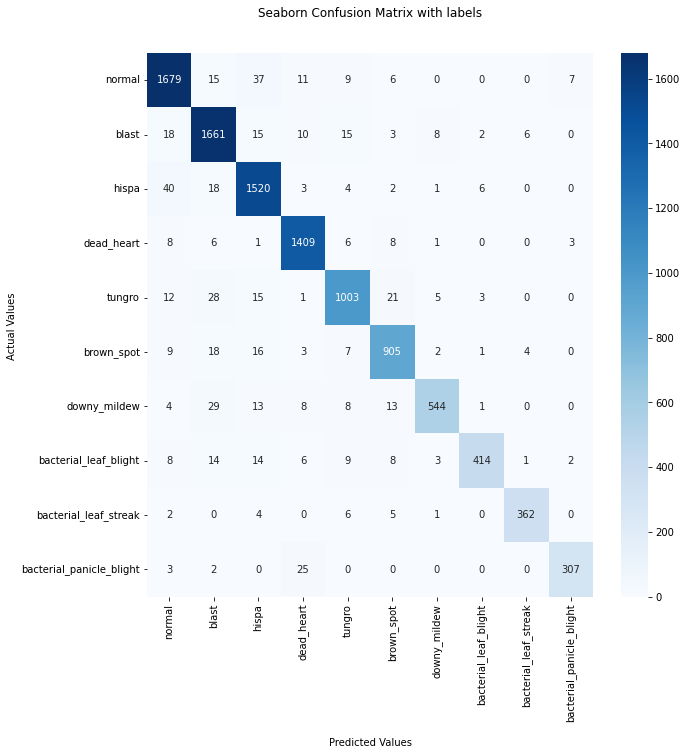

In [29]:
cf_matrix = confusion_matrix(preds['label'].map(automl.reader.class_mapping), 
                             OOFs)

plt.figure(figsize = (10, 10))

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt = 'd')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

inverse_class_mapping = {y: x for x,y in automl.reader.class_mapping.items()}
labels = [inverse_class_mapping[i] for i in range(len(inverse_class_mapping))]
ax.xaxis.set_ticklabels(labels, rotation = 90)
ax.yaxis.set_ticklabels(labels, rotation = 0)

plt.show()